In [1]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
#from ImageDataset import ImageDataset
from image_dataset import ImageDataset
from torch import nn
import torch

# Set the path to the folder containing your unlabeled images
train_path = "data/DIV2K/train"
test_path = "data/DIV2K/valid"

# Define the transformation to be applied to each image
transform = transforms.Compose([
    #transforms.Resize((256, 256)),  # Resize the image to a fixed size
    transforms.RandomCrop((512,512)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()  # Convert the image to a tensor
])

# Create the ImageFolder dataset
train_data = ImageDataset(train_path, transform=transform)

test_data = ImageDataset(test_path, transform=transform)

In [2]:
from torch.utils.data import DataLoader
train_data_loader = DataLoader(dataset=train_data, 
                              batch_size=8, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_data_loader = DataLoader(dataset=test_data, 
                              batch_size=8, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

In [3]:
#img, label = train_data[0][0], train_data[0][1]
img = train_data[0]
#class_names = train_data.classes
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"img range = [{torch.min(img)}, {torch.max(img)}]")
#print(f"Image label: {label}")
#print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.4941, 0.4667, 0.4039,  ..., 0.1412, 0.1412, 0.1255],
         [0.5020, 0.5412, 0.4863,  ..., 0.1373, 0.1412, 0.1255],
         [0.5412, 0.5490, 0.4863,  ..., 0.1608, 0.1529, 0.1373],
         ...,
         [0.3961, 0.3922, 0.4000,  ..., 0.3961, 0.4039, 0.3294],
         [0.4039, 0.4118, 0.3882,  ..., 0.3765, 0.3490, 0.2980],
         [0.4000, 0.4039, 0.3882,  ..., 0.3608, 0.3137, 0.2510]],

        [[0.3922, 0.3922, 0.3216,  ..., 0.1098, 0.1098, 0.0902],
         [0.4000, 0.4706, 0.4039,  ..., 0.1059, 0.1098, 0.0902],
         [0.4157, 0.4784, 0.4039,  ..., 0.1255, 0.1176, 0.1020],
         ...,
         [0.3569, 0.3529, 0.3647,  ..., 0.2980, 0.3255, 0.2667],
         [0.3608, 0.3725, 0.3608,  ..., 0.3333, 0.3294, 0.2627],
         [0.3529, 0.3647, 0.3529,  ..., 0.3176, 0.2863, 0.2118]],

        [[0.3137, 0.4000, 0.4039,  ..., 0.0784, 0.0745, 0.0510],
         [0.2941, 0.4353, 0.4588,  ..., 0.0706, 0.0667, 0.0510],
         [0.2824, 0.3804, 0.3765,  ..., 0.09

Original shape: torch.Size([3, 512, 512]) -> [color_channels, height, width]
Image permute shape: torch.Size([512, 512, 3]) -> [height, width, color_channels]


(-0.5, 511.5, 511.5, -0.5)

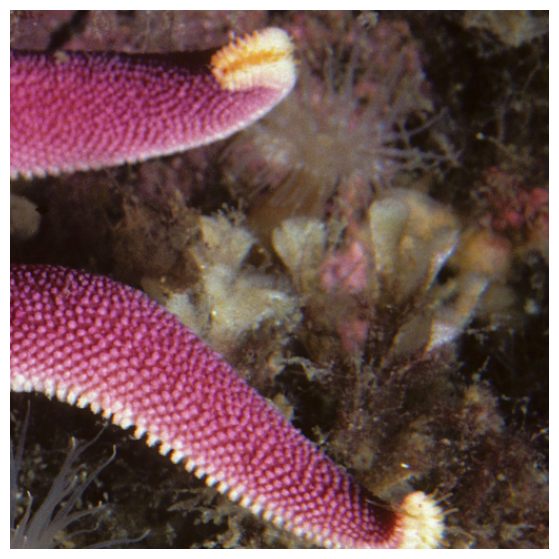

In [4]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
#plt.title(class_names[label], fontsize=14)

In [5]:
next(iter(train_data_loader)).shape

torch.Size([8, 3, 512, 512])

In [6]:
from pathlib import Path
# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "my_model_re.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [7]:
from autoencoder_upscale_model import AutoencoderUpscaleModel
import torch
from my_upscale_model import UpscaleModel
from my_upscale_model2 import UpscaleModel2
from train_autoencoder import downsample_image

device = "cpu"

batch = next(iter(test_data_loader))

model = UpscaleModel2()

model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

model.to(device)

img = downsample_image(batch, 4)
model.eval()
with torch.inference_mode():
    result = model(img.to(device))



Original shape: torch.Size([3, 256, 256]) -> [color_channels, height, width]
Image permute shape: torch.Size([256, 256, 3]) -> [height, width, color_channels]


(-0.5, 255.5, 255.5, -0.5)

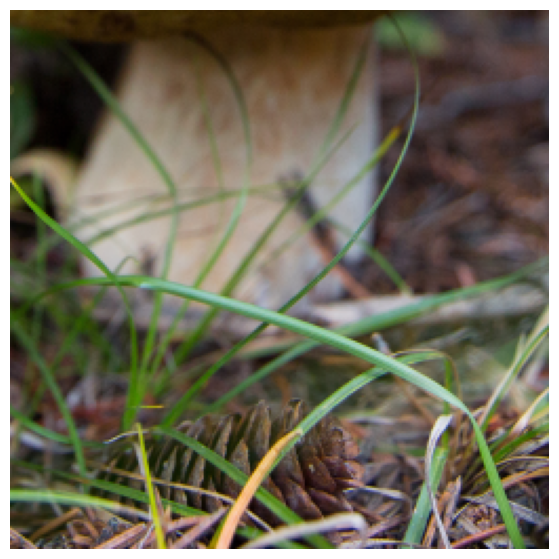

In [8]:
img = downsample_image(batch)[1]
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")

In [9]:
img

tensor([[[0.3461, 0.3441, 0.3304,  ..., 0.2755, 0.3059, 0.3137],
         [0.3333, 0.3294, 0.3157,  ..., 0.2873, 0.3137, 0.3225],
         [0.3167, 0.3098, 0.3000,  ..., 0.3000, 0.3196, 0.3353],
         ...,
         [0.5422, 0.4392, 0.3706,  ..., 0.1137, 0.0775, 0.0696],
         [0.3480, 0.2971, 0.2980,  ..., 0.1186, 0.0990, 0.0686],
         [0.3471, 0.3373, 0.3265,  ..., 0.1500, 0.1255, 0.1020]],

        [[0.2608, 0.2608, 0.2431,  ..., 0.2000, 0.2137, 0.2353],
         [0.2480, 0.2382, 0.2265,  ..., 0.2108, 0.2382, 0.2520],
         [0.2294, 0.2147, 0.2108,  ..., 0.2294, 0.2578, 0.2745],
         ...,
         [0.3814, 0.3127, 0.2706,  ..., 0.0951, 0.0637, 0.0539],
         [0.2245, 0.2010, 0.2069,  ..., 0.0980, 0.0775, 0.0500],
         [0.2529, 0.2549, 0.2225,  ..., 0.1225, 0.1029, 0.0892]],

        [[0.0833, 0.0657, 0.0578,  ..., 0.1745, 0.1912, 0.2225],
         [0.0667, 0.0559, 0.0441,  ..., 0.1980, 0.2127, 0.2324],
         [0.0480, 0.0392, 0.0392,  ..., 0.2118, 0.2363, 0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original shape: torch.Size([3, 512, 512]) -> [color_channels, height, width]
Image permute shape: torch.Size([512, 512, 3]) -> [height, width, color_channels]


(-0.5, 511.5, 511.5, -0.5)

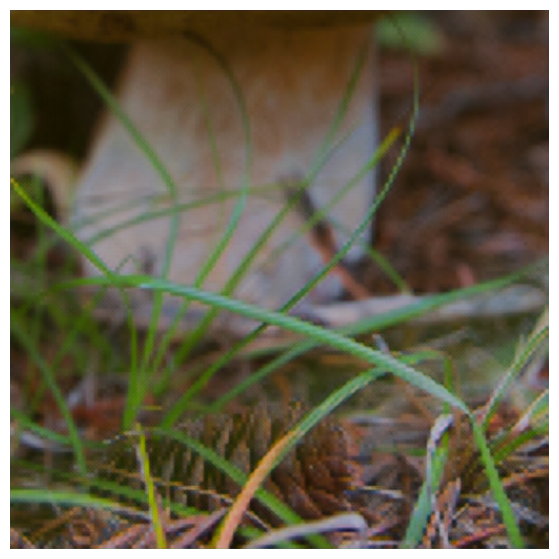

In [10]:
img = result[1].cpu()
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")

In [11]:
result.shape

torch.Size([8, 3, 512, 512])

In [12]:
img.shape

torch.Size([3, 512, 512])

In [13]:
result[1]

tensor([[[0.2943, 0.3364, 0.3432,  ..., 0.3051, 0.3127, 0.2855],
         [0.3325, 0.3487, 0.3584,  ..., 0.3129, 0.3315, 0.3173],
         [0.3255, 0.3489, 0.3557,  ..., 0.3069, 0.3100, 0.2989],
         ...,
         [0.3266, 0.3534, 0.3683,  ..., 0.1774, 0.1728, 0.1860],
         [0.3151, 0.3246, 0.3429,  ..., 0.1793, 0.1837, 0.2032],
         [0.2335, 0.2960, 0.2953,  ..., 0.1908, 0.1934, 0.2070]],

        [[0.2470, 0.2632, 0.2668,  ..., 0.2281, 0.2672, 0.2378],
         [0.2751, 0.2766, 0.2764,  ..., 0.2293, 0.2425, 0.2470],
         [0.2761, 0.2618, 0.2688,  ..., 0.2307, 0.2451, 0.2440],
         ...,
         [0.2722, 0.2418, 0.2459,  ..., 0.1428, 0.1482, 0.1438],
         [0.2605, 0.2226, 0.2248,  ..., 0.1458, 0.1554, 0.1597],
         [0.2971, 0.2767, 0.2762,  ..., 0.1958, 0.2129, 0.1595]],

        [[0.2200, 0.1605, 0.1531,  ..., 0.2077, 0.2150, 0.1684],
         [0.1590, 0.1158, 0.1029,  ..., 0.1830, 0.2010, 0.2295],
         [0.1350, 0.0939, 0.0779,  ..., 0.1749, 0.1760, 0.

In [14]:
img1 = downsample_image(batch, factor=4)
img1.shape

torch.Size([8, 3, 128, 128])

In [15]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[[[-0.1001,  0.0236, -0.0355],
          [-0.1223, -0.0792,  0.0818],
          [ 0.0575, -0.0617,  0.1489]],

         [[ 0.0567, -0.0020, -0.0950],
          [-0.1452, -0.0315, -0.1056],
          [ 0.1736, -0.0453,  0.0871]],

         [[ 0.1395, -0.1069, -0.0333],
          [-0.2057,  0.1482,  0.1651],
          [ 0.1117,  0.0926, -0.0824]]],


        [[[ 0.1274, -0.1035,  0.1865],
          [-0.0868, -0.0263, -0.1536],
          [-0.0584,  0.1627, -0.0036]],

         [[ 0.1163, -0.1995, -0.1286],
          [ 0.0496, -0.0072,  0.1836],
          [ 0.1461, -0.2030, -0.0032]],

         [[-0.0467,  0.2059, -0.1294],
          [-0.1657,  0.1948,  0.0511],
          [-0.1223,  0.0911, -0.0204]]],


        [[[ 0.0598, -0.1138,  0.0385],
          [-0.1745,  0.0033,  0.0034],
          [ 0.0319,  0.1637, -0.0581]],

         [[-0.1748, -0.1196,  0.1508],
          [-0.0421,  0.1626,  0.1841],
          [-0.0929,  0.0302, -0.1976]],

         [[ 0.1898, -0

In [16]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In [17]:
batch.shape, result.shape

(torch.Size([8, 3, 512, 512]), torch.Size([8, 3, 512, 512]))

In [18]:
loss = loss_fn(result, batch.to(device))
loss

tensor(78608.0625)

In [19]:
type(model)

my_upscale_model2.UpscaleModel2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 511.5, 511.5, -0.5)

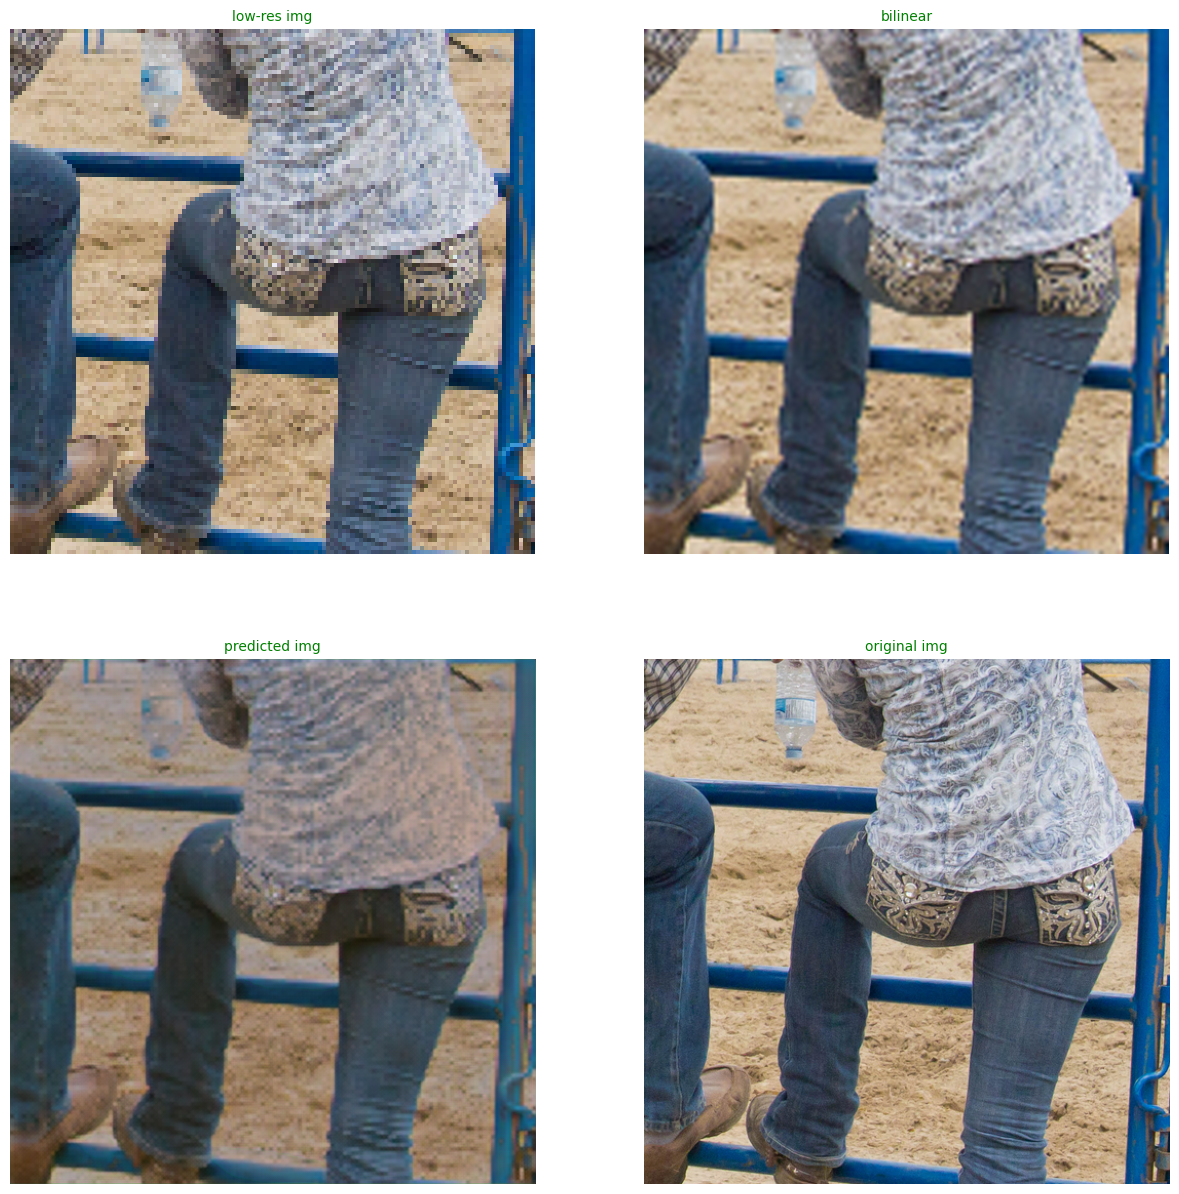

In [20]:
i = 3
y = batch[i]
y_pred = result[i]

upsample = nn.Upsample(scale_factor=4, mode="bicubic")

# Plot predictions
plt.figure(figsize=(15, 15))
nrows = 2
ncols = 2

plt.subplot(nrows, ncols, 1)
plt.imshow(downsample_image(y.unsqueeze(dim=0), factor=4).squeeze().permute(1, 2, 0))
plt.title("low-res img", fontsize=10, c="g") # green text if correct
plt.axis(False)

plt.subplot(nrows, ncols, 2)
plt.imshow(upsample(downsample_image(y.unsqueeze(dim=0), factor=4)).squeeze().permute(1, 2, 0))
plt.title("bilinear", fontsize=10, c="g") # green text if correct
plt.axis(False)

plt.subplot(nrows, ncols, 3)
plt.imshow(y_pred.permute(1, 2, 0))
plt.title("predicted img", fontsize=10, c="g") # green text if correct
plt.axis(False)

plt.subplot(nrows, ncols, 4)
plt.imshow(y.permute(1, 2, 0))
plt.title("original img", fontsize=10, c="g") # green text if correct
plt.axis(False)

In [21]:
from vgg_loss import VGGLoss
vgg_loss_fn = VGGLoss(device="cpu")


d:\oleyon\github_repo\deep_learning_diploma\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\oleyon\github_repo\deep_learning_diploma\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [22]:
some_loss = vgg_loss_fn.forward_demo(batch[i])
some_loss.shape

torch.Size([512, 64, 64])

In [23]:
i=0
for param in vgg_loss_fn.vgg.parameters():
    print(param.shape)
    i+=1
i

torch.Size([64, 3, 3, 3])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([128, 64, 3, 3])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([256, 128, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([512, 256, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])


20

Original shape: torch.Size([64, 64]) -> [height, width]


(-0.5, 63.5, 63.5, -0.5)

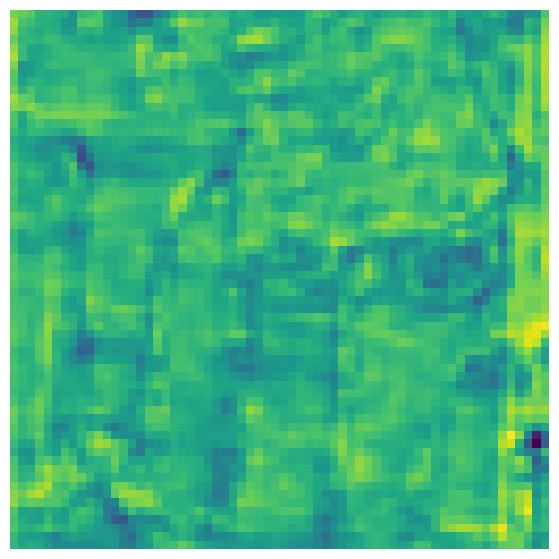

In [24]:
img = some_loss[11].cpu()

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [height, width]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img)
plt.axis("off")

In [25]:
# from collections import OrderedDict

# import torch
# from torch import nn, optim

# from ignite.engine import *
# from ignite.handlers import *
# from ignite.metrics import *
# from ignite.utils import *
# from ignite.contrib.metrics.regression import *
# from ignite.contrib.metrics import *

# # create default evaluator for doctests

# def eval_step(engine, batch):
#     return batch

# default_evaluator = Engine(eval_step)

# # create default optimizer for doctests

# param_tensor = torch.zeros([1], requires_grad=True)
# default_optimizer = torch.optim.SGD([param_tensor], lr=0.1)

# # create default trainer for doctests
# # as handlers could be attached to the trainer,
# # each test must define his own trainer using `.. testsetup:`

# def get_default_trainer():

#     def train_step(engine, batch):
#         return batch

#     return Engine(train_step)

# # create default model for doctests

# default_model = nn.Sequential(OrderedDict([
#     ('base', nn.Linear(4, 2)),
#     ('fc', nn.Linear(2, 1))
# ]))

# #manual_seed(666)

# test_y_pred = torch.randn((3,512,512))

# from ignite.metrics import *
# metric = SSIM(data_range=1.0)
# metric.attach(default_evaluator, 'ssim')
# state = default_evaluator.run([[y_pred.unsqueeze(dim=0), y.unsqueeze(dim=0)]])
# print(state.metrics['ssim'])
# print(f"ssim loss = {torch.tensor((1 - state.metrics['ssim'])/2)}")

In [26]:
# from custom_loss import SSIMLoss, VGGPerceptualLoss, SSIM, CombinedLoss

# ssim_loss_fn = SSIM(window_size=11,sigma=1.5)
# vgg_loss_fn = VGGPerceptualLoss()
# vgg_ssim_fn = CombinedLoss(loss_shift=1.0)
# ssim_loss_res = ssim_loss_fn(y_pred.unsqueeze(dim=0), y.unsqueeze(dim=0))
# vgg_loss_fn.to('cuda')
# vgg_loss_res = vgg_loss_fn(y_pred.unsqueeze(dim=0).to('cuda'), y.unsqueeze(dim=0).to('cuda'))
# true_loss_res = vgg_ssim_fn(y_pred.unsqueeze(dim=0), y.unsqueeze(dim=0))
# loss_res = vgg_loss_res + 1 * ssim_loss_res
# #vgg_loss_fn.to('cuda')
# for param in vgg_loss_fn.parameters():
#     print(param.device)
# ssim_loss_res, vgg_loss_res, loss_res, true_loss_res

In [27]:
import math

window_size = 11
sigma = 1.5
gauss = torch.Tensor([math.exp(-(x - window_size // 2) ** 2 / float(2 * sigma ** 2)) for x in range(window_size)])
window = gauss.unsqueeze(0) * gauss.unsqueeze(1)

In [28]:
gauss

tensor([0.0039, 0.0286, 0.1353, 0.4111, 0.8007, 1.0000, 0.8007, 0.4111, 0.1353,
        0.0286, 0.0039])

(-0.5, 10.5, 10.5, -0.5)

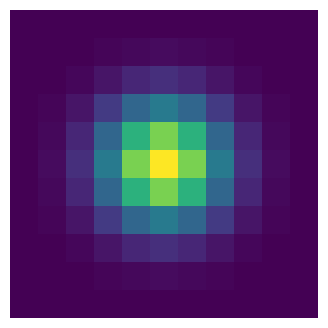

In [29]:
plt.figure(figsize=(4, 4))
plt.imshow(window)
plt.axis("off")

In [30]:
from train_statistics import TrainingStatisticsLogger
import os
print(os.getcwd())
logger = TrainingStatisticsLogger()
logger.load_from_json(filename='log/my_model_test_log.json')
logger.ssim

d:\oleyon\github_repo\deep_learning_diploma\diploma


[0.6734800888941839,
 0.6566922481243427,
 0.6754465424097501,
 0.6765435429719778,
 0.6720225077409011]